In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
import pandas as pd
df= pd.read_csv("/content/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Data Preparation

In [ ]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
# Droping Unneccessary Columns
df.drop(columns=['Name','PassengerId'], inplace=True)

In [ ]:
# Filling Null Value Of Numerical Column with mean
def fill_na_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

columns_to_fill = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

fill_na_with_mean(df, columns_to_fill)

In [ ]:
# Filling Null Value Of Object Column with mode
def fill_na_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

columns_to_fill = ['HomePlanet','CryoSleep','Cabin','VIP','Destination']

fill_na_with_mode(df, columns_to_fill)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[['CryoSleep', 'VIP', 'Transported']] = df[['CryoSleep', 'VIP', 'Transported']].astype(int)

# Feature Engineering

In [ ]:
# Scaling numerical columns
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler with the desired feature range
scaler = MinMaxScaler(feature_range=(0, 1))
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    if set(df[col].unique()) == {0, 1}:
        continue

    # Reshaped the data to a 2D array
    col_data = df[col].values.reshape(-1, 1)

    # Fiting the scaler on the column data
    scaler.fit(col_data)

    # Transformed the column data
    df[col] = scaler.transform(col_data)

In [ ]:
# Performing label encoding
from sklearn.preprocessing import LabelEncoder
ordinal_columns = df.select_dtypes("O").columns
numerical_columns = df.select_dtypes(np.number).columns
encoder = LabelEncoder()

# Fiting and transforming the training data
for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
x= df.drop("Transported", axis=1)
y= df.Transported

In [ ]:
# Balancing Data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_new, y_new = sampler.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Modeling

In [ ]:
class FixedLogisticRegression:
    """
    A custom implementation of Logistic Regression using gradient descent.
    """

    def __init__(self, learning_rate=0.01, n_iterations=5000, add_intercept=True):
        """
        Initialize the logistic regression model.

        Parameters:
            learning_rate (float): Learning rate for gradient descent.
            iterations (int): Number of iterations for optimization.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.add_intercept = add_intercept

    def _sigmoid(self, z):
        """
        Compute the sigmoid function, which maps values to a range (0,1).

        Parameters:
            z (array-like): Input array.

        Returns:
            array-like: Sigmoid-transformed output.
        """
        z = np.clip(z, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.

        Parameters:
            X (array-like): Feature matrix.
            y (array-like): Target vector (0 or 1).
        """
        if self.add_intercept:
            X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

        n_samples, n_features = X.shape

        # Better initialization (Xavier/Glorot)
        self.weights = np.random.randn(n_features) * np.sqrt(2./n_features)

        # Gradient descent with momentum
        prev_dw = np.zeros(n_features)
        momentum = 0.9

        for i in range(self.n_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights)
            y_pred = self._sigmoid(linear_model)

            # Backward pass
            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error)

            # Update with momentum
            dw = momentum * prev_dw + (1 - momentum) * dw
            self.weights -= self.learning_rate * dw
            prev_dw = dw

            # Print progress every 500 iterations
            if i % 500 == 0:
                loss = -np.mean(y * np.log(y_pred + 1e-15) + (1-y) * np.log(1-y_pred + 1e-15))
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict_proba(self, X):
        """
        Predict the class labels (0 or 1) for input data.

        Parameters:
            X (array-like): Feature matrix.

        Returns:
            array-like: Predicted labels (0 or 1).
        """
        if self.add_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._sigmoid(np.dot(X, self.weights))

    def predict(self, X, threshold=0.5):
        """Predict class labels"""
        return (self.predict_proba(X) >= threshold).astype(int)

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
print("Training Logistic Regression")
lr = FixedLogisticRegression(learning_rate=0.01, n_iterations=5000)
lr.fit(X_train_scaled, y_train)

Training Logistic Regression
Iteration 0, Loss: 0.7570
Iteration 500, Loss: 0.5267
Iteration 1000, Loss: 0.4924
Iteration 1500, Loss: 0.4819
Iteration 2000, Loss: 0.4769
Iteration 2500, Loss: 0.4738
Iteration 3000, Loss: 0.4716
Iteration 3500, Loss: 0.4700
Iteration 4000, Loss: 0.4687
Iteration 4500, Loss: 0.4677


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report)

def evaluate_model(y_true, y_pred, class_labels=None):
    """
    Evaluate a classification model with various metrics and plots.

    Parameters:
        y_true (array-like): True labels.
        y_pre (array-like): Predicted labels.
        y_prob (array-like, optional): Predicted probabilities for the positive class (for ROC curve).
        class_labels (list, optional): Class labels for confusion matrix.

    Returns:
        dict: A dictionary containing evaluation metrics.
    """
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Not Transported', 'Transported']))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Transported', 'Transported'],
                yticklabels=['Not Transported', 'Transported'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Implementation Results:
Accuracy: 0.7869
Precision: 0.7924
Recall: 0.7852
F1 Score: 0.7888
ROC AUC: 0.7869

Classification Report:
                 precision    recall  f1-score   support

Not Transported       0.78      0.79      0.78       856
    Transported       0.79      0.79      0.79       880

       accuracy                           0.79      1736
      macro avg       0.79      0.79      0.79      1736
   weighted avg       0.79      0.79      0.79      1736



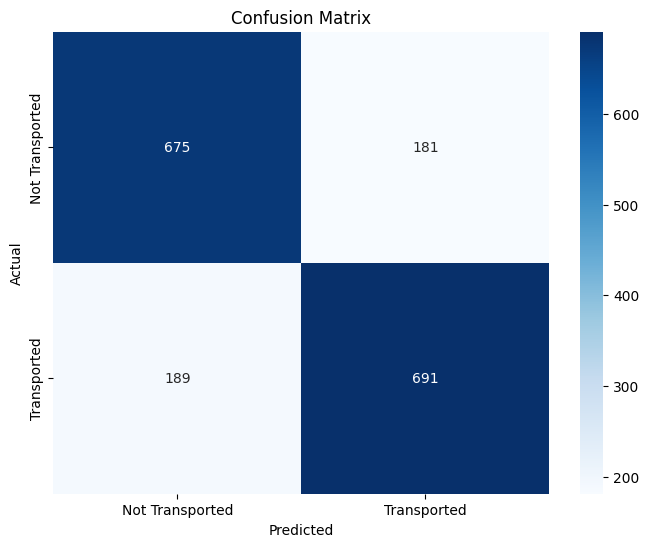

In [ ]:
# Predict and evaluate
y_pred= lr.predict(X_test_scaled)
print("Implementation Results:")
evaluate_model(y_test, y_pred)